Job Status: job has successfully run


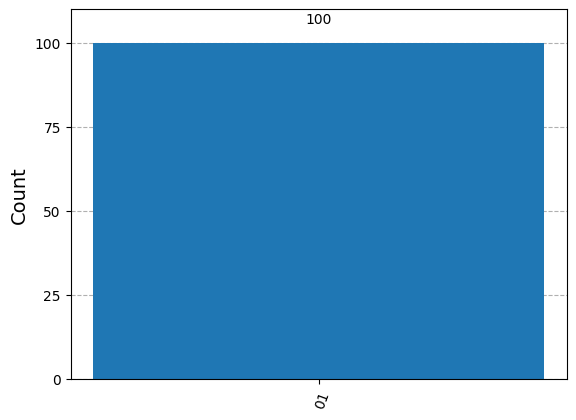

In [39]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import numpy as np
from qiskit_aer import Aer
from qiskit_ibm_provider.job import job_monitor
from qiskit.visualization import plot_state_city, plot_bloch_multivector, plot_state_qsphere, plot_histogram

# Function Oracle Setup: Assumed the function is balanced for demonstration.
def deutsch_jozsa_oracle(circuit, q):
    # Example oracle for a balanced function
    circuit.cx(q[0], q[1])  # Entangles q[0] with q[1]
    circuit.x(q[1])  # Inverts q[1]

q = QuantumRegister(2)
circuit = QuantumCircuit(q, ClassicalRegister(2))

# Initialization
circuit.initialize([1, 0], q[0])  # Initialize q[0] to |0⟩
circuit.x(q[1])  # Initialize q[1] to |1⟩ => |01⟩ q[0]q[1]
circuit.h(q)  # Apply Hadamard to both qubits => superposition state

# Apply the Oracle
deutsch_jozsa_oracle(circuit, q)

# Apply Hadamard again to the first qubit
circuit.h(q[0])

# Measure the first qubit to determine if the function is constant or balanced
circuit.measure([0], [0])  # Measuring only q[0]

# Execute the circuit on the statevector simulator
# statevector_simulator = Aer.get_backend('statevector_simulator')
# job = statevector_simulator.run(circuit)
# result = job.result()
# statevector = result.get_statevector(circuit) # Obtain the final statevector

# Visualize the statevector
# plot_state_city(statevector)  # Provides a cityscape-like plot of the statevector amplitudes
# plot_bloch_multivector(statevector)  # Shows the state on a Bloch sphere for each qubit
# plot_state_qsphere(statevector)  # Displays the statevector on a Q-sphere

# Execute the circuit on the qasm simulator after measurement
qasm_simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = qiskit.transpile(circuit, qasm_simulator)
job = qasm_simulator.run(transpiled_circuit, shots=100)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)

# Visualize the statevector
plot_histogram(counts)

In [18]:
print(circuit)

       ┌─────────────────┐┌───┐     ┌───┐     ┌─┐
q15_0: ┤ Initialize(1,0) ├┤ H ├──■──┤ H ├─────┤M├
       └──────┬───┬──────┘├───┤┌─┴─┐├───┤┌───┐└╥┘
q15_1: ───────┤ X ├───────┤ H ├┤ X ├┤ X ├┤ H ├─╫─
              └───┘       └───┘└───┘└───┘└───┘ ║ 
c14: 2/════════════════════════════════════════╩═
                                               0 


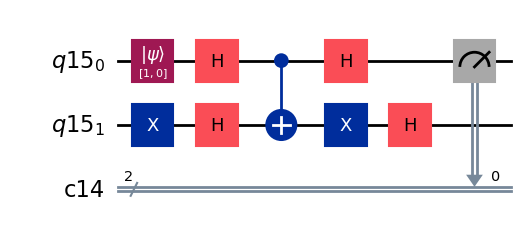

In [19]:
# Draw the circuit using Matplotlib to create a visual diagram
circuit_diagram = circuit.draw(output='mpl')
circuit_diagram  # This will display the circuit diagram inline automatically